# Точные методы решения СЛАУ
## Методы:
### 1. Метод Гаусса
### 2. Метод прогонки ( для трёхдиагональной матрицы A )
### 3. Метод Холецкого ( А > 0 )
### Постановка задачи:
Пусть известны матрица вещественных чисел $A\in \rm I\!R ^{n*n}$ и вектор правой части $f\in \rm I\!R^n$ уравнения:
$$Ax = f,$$
Требуется найти вектор $x \in \rm I\!R^n$, из этого уравнения.



# Метод Гаусса


My__time:  [0.02600264549255371, 0.11699819564819336, 0.2345130443572998, 0.528038501739502, 0.6670031547546387]
Numpy_time:  [0.009536266326904297, 0.0010001659393310547, 0.0010008811950683594, 0.0010008811950683594, 0.001970529556274414]


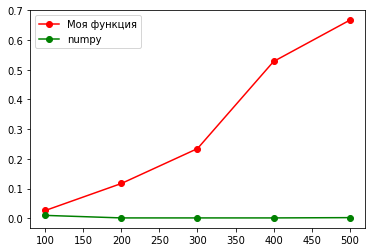

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt

def gauss(A, f):
    size = f.size    
    x = np.zeros(size) 

    for k in range(size):
        f[k] = f[k] / A[k][k] 
        A[k] = A[k] / A[k][k]
        for i in range(k + 1, size):
            f[i] = f[i] - f[k] * A[i][k]
            A[i] = A[i] - A[k] * A[i][k]
            A[i][k] = 0

    for i in range(size - 1, -1, -1):
        x[i] = f[i]
        for j in range(i + 1, size):
            x[i] = x[i] - A[i][j] * x[j]

    return x

def diag(A):
    size = np.size(A[0])
    for i in range(size):      
        sum = 0         
        for j in range(size):
            if j != i:
                sum += abs(A[i][j])
        A[i][i] = abs(A[i][i]) + sum


k = 100
n = 5   
my_time = [0] * n
numpy_time = [0] * n
gap = [i * k for i in range(1, n+1)]

for i in range(0, n):
    A = np.random.rand(k * (i+1), k * (i+1))
    f = np.random.rand(k * (i+1))

    diag(A)

    start_time = time.time()
    np_x = np.linalg.solve(A, f)
    end_time = time.time()
    numpy_time[i] = end_time - start_time
    
    start_time = time.time()
    my_x = gauss(A, f)
    end_time = time.time()
    my_time[i] = end_time - start_time
    
print('My__time: ', my_time)
print('Numpy_time: ', numpy_time)
plt.plot(gap, my_time, 'ro-', label='Моя функция')
plt.plot(gap, numpy_time, 'go-', label='numpy')
plt.legend()

plt.show()




My time:  [0.022448301315307617, 0.13799619674682617, 0.4795112609863281, 1.1075563430786133, 1.9730191230773926]
l_time:  [0.0, 0.0, 0.001001119613647461, 0.0, 0.0009999275207519531]


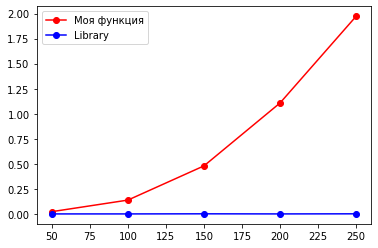

In [13]:
import numpy as np
import time
import matplotlib.pyplot as plt
from scipy.linalg import solve_triangular

def cholecky(A, f):
    n = A.shape[0]
    S = np.zeros((n, n))

    for i in range(n): # Строим матрицу S
        sum = 0
        for k in range(i):
            sum += S[k][i] ** 2
        S[i][i] = (A[i][i] - sum) ** 0.5

        for j in range(i+1, n):
            sum = 0
            for k in range(i):
                sum += S[k][i] * S[k][j]
            S[i][j] = (A[i][j] - sum) / S[i][i]
            

    y = np.zeros(n)
    for i in range(n):
        sum = 0
        for k in range(i):
            sum += S[k][i] * y[k]
        y[i] = (f[i] - sum) / S[i][i]
   

    x = np.zeros(n)
    for i in range(n):
        sum = 0
        for k in range(i+1, n):
            sum += S[i][k] * x[k]
        x[i] = (y[i] - sum) / S[i][i]
        
    return x



def diag(A):
    n = A.shape[0]
    for i in range(n):      
        sum = 0      
        for j in range(n):
            if j != i:
                sum += abs(A[i][j])
        A[i][i] = abs(A[i][i]) + sum
    


k=50
n = 5
my_time = [0] * n
l_time = [0] * n
gap = [i*k for i in range(1, n+1)]

for i in range(0, n):
    A = np.random.rand(k * (i+1), k * (i+1))
    f = np.random.rand(k * (i+1))

    diag(A)

    start_time = time.time()
    S = np.linalg.cholesky(A)
    y = solve_triangular(S, f, lower=True)
    S = np.transpose(S)
    l_x = solve_triangular(S, y, lower=False)
    end_time = time.time()
    l_time[i] = end_time - start_time
    
    start_time = time.time()
    my_x = cholecky(A, f)
    end_time = time.time()
    my_time[i] = end_time - start_time
    
print('My time: ', my_time)
print('l_time: ', l_time)

plt.plot(gap, my_time, 'ro-', label='Моя функция')
plt.plot(gap, l_time, 'bo-', label='Library')
plt.legend()

plt.show()


# Метод прогонки (3х диагональной матрицы)


My time:  [0.0022649765014648438, 0.004011631011962891, 0.007997989654541016, 0.007992744445800781, 0.008990287780761719]
l_time:  [0.0, 0.0, 0.0, 0.0, 0.0]


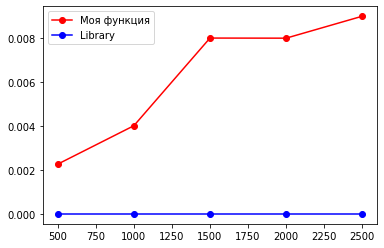

In [3]:
import numpy as np
import time
import matplotlib.pyplot as plt
from scipy.linalg import solve_banded

def sweep (a, b, c, f):
    n = f.size
    
    alpha = [0] * (n+1)
    betta = [0] * (n+1)
    x = [0] * (n+1)
    a[0] = 0
    c[n-1] = 0
    alpha[0] = 0
    betta[0] = 0
    
    for i in range(n):
        d = a[i] * alpha[i] + b[i]
        alpha[i+1] = -c[i] / d
        betta[i+1] = (f[i] - a[i] * betta[i]) / d
        
    x[n] = 0
    for i in range(n-1, -1, -1):
        x[i] = alpha[i+1] * x[i+1] + betta[i+1]

    x = x[:-1]
    return x


def diag(a, b, c):
    n = len(b)
    for i in range(n):
        sum = abs(a[i]) + abs(c[i])
        b[i] = abs(b[i]) + sum



k = 500
n = 5
my_time = [0] * n
l_time = [0] * n
gap = [i*k for i in range(1, n+1)]

for i in range(0, n):
    size = k * (i+1)
    a = np.random.rand(size)   # элемент с индексом 0 пропадет
    b = np.random.rand(size)
    c = np.random.rand(size)   # элемент с индексом n-1 пропадет
    f = np.random.rand(size)
        
    diag(a, b, c)   # матрица теперь с диаг. преобладанием
        
    # для библиотечной solve_banded
    af = np.random.rand(3, size)
    af[0][1:] = c[:-1]
    af[1] = b
    af[2][:-1] = a[1:]
    
    start_time = time.time()
    my_x = sweep(a, b, c, f)
    end_time = time.time()
    my_time[i] = end_time - start_time
    
    start_time = time.time()
    np_x = solve_banded((1,1), af, f)
    end_time = time.time()
    l_time[i] = end_time - start_time
    
print('My time: ', my_time)
print('l_time: ', l_time)

plt.plot(gap, my_time, 'ro-', label='Моя функция')
plt.plot(gap, l_time, 'bo-', label='Library')
plt.legend()

plt.show()
    